In [1]:
'''Data set: vhttps://www.kaggle.com/aledenigres/adultdataset'''

'Data set: vhttps://www.kaggle.com/aledenigres/adultdataset'

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [61]:
data = pd.read_csv('./train_data.csv')
train_data = pd.read_csv('./test_data.csv')

In [40]:
data.head()

,Id,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 16 columns):
Id                32560 non-null int64
age               32560 non-null int64
workclass         32560 non-null object
fnlwgt            32560 non-null int64
education         32560 non-null object
education.num     32560 non-null int64
marital.status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital.gain      32560 non-null int64
capital.loss      32560 non-null int64
hours.per.week    32560 non-null int64
native.country    32560 non-null object
income            32560 non-null object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [62]:
df= data.drop(['Id'], axis=1)

In [43]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [44]:
def show_unique(columns):
    for column in columns:
        print('------')
        print(df.groupby([column]).size())
show_unique(['workclass', 'education', 'education.num', 'marital.status',
             'occupation', 'relationship', 'race', 'sex', 'native.country'])

------
workclass
?                    1836
Federal-gov           960
Local-gov            2093
Never-worked            7
Private             22696
Self-emp-inc         1116
Self-emp-not-inc     2541
State-gov            1297
Without-pay            14
dtype: int64
------
education
10th              933
11th             1175
12th              433
1st-4th           168
5th-6th           333
7th-8th           646
9th               514
Assoc-acdm       1067
Assoc-voc        1382
Bachelors        5354
Doctorate         413
HS-grad         10501
Masters          1723
Preschool          51
Prof-school       576
Some-college     7291
dtype: int64
------
education.num
1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5354
14     1723
15      576
16      413
dtype: int64
------
marital.status
Divorced                  4443
Married-AF-spouse           23
Married-civ-spouse       14976
Married-spous

In [45]:
df.describe(include=['object', 'bool'])

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [63]:
def count_plot(df, columns):
    for c in columns:
        x, y, hue = c[0], 'Proportions', c[1]
        prop_df = (df[hue].groupby(df[x]).value_counts(normalize=True)
                   .rename(y).reset_index())
        f, axes = plt.subplots(1, 2, figsize=(10, 6))
        ax1 = sns.countplot(x=x, hue=hue, data=df, ax=axes[0])
        ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
        ax2 = sns.barplot(x=x, y=y, hue=hue, data=prop_df, ax=axes[1])
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

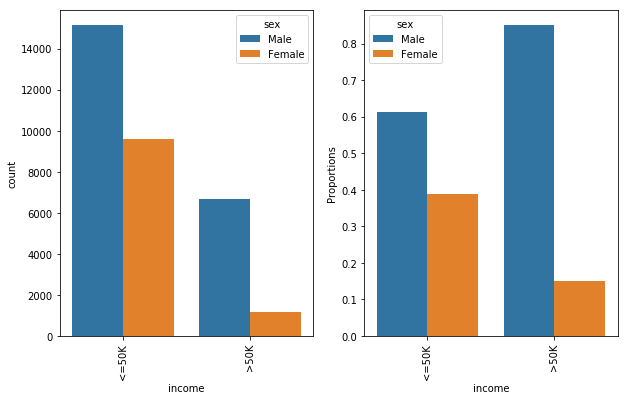

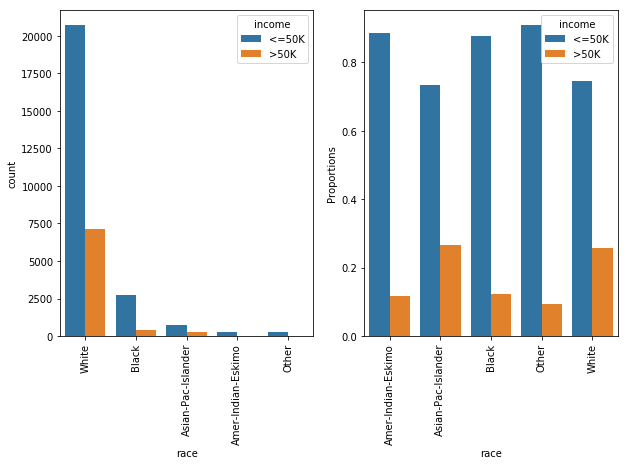

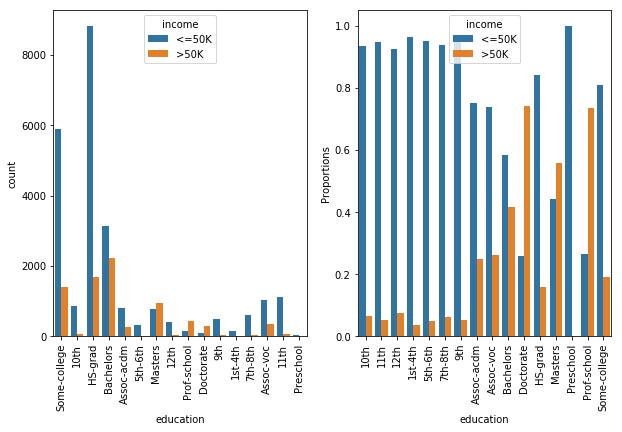

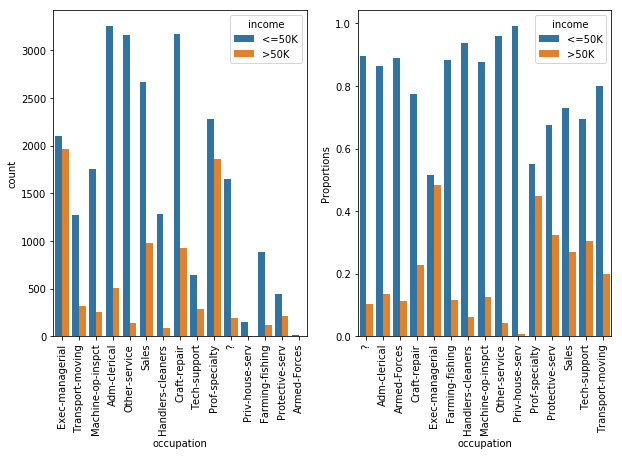

In [231]:
count_plot(df, [('income', 'sex'), ('race', 'income'), ('education', 'income'), ('occupation', 'income')])

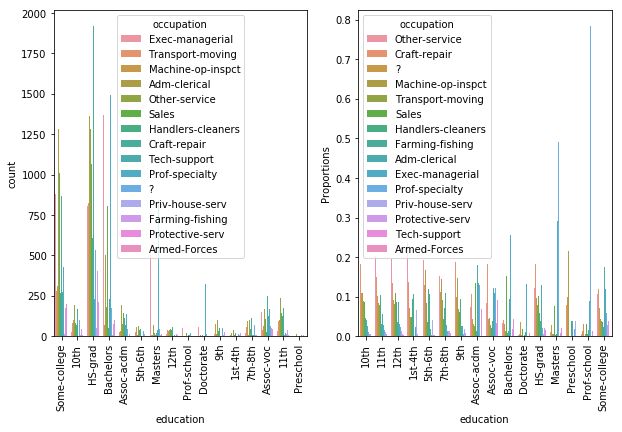

In [48]:
count_plot(df, [('education', 'occupation')])

In [49]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
1,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
2,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
3,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


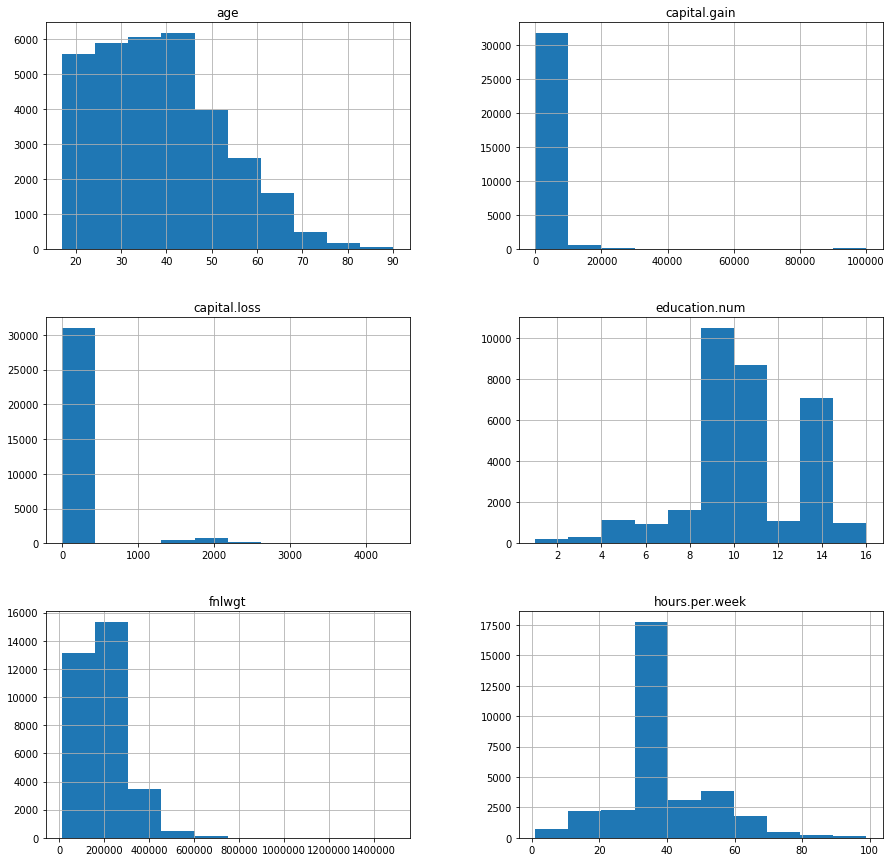

In [50]:
g = df[['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']].hist(figsize=(15, 15))

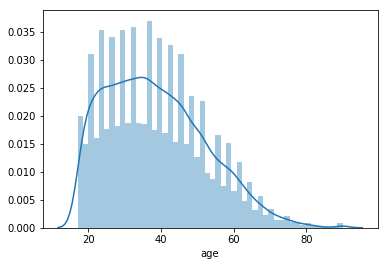

In [35]:
sns.distplot(df['age'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000144C5A58>,
      dtype=object)

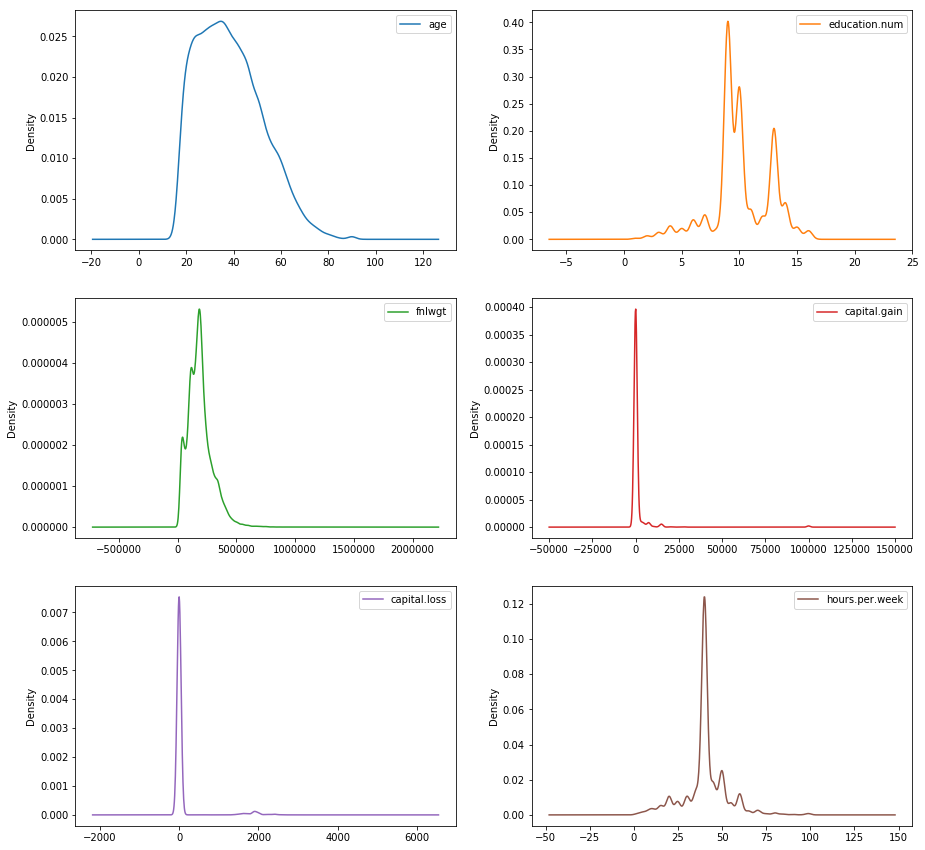

In [16]:
df[['age', 'education.num', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']].plot(kind='density',
                                                                                              subplots=True, layout=(3, 2),
                                                                                              sharex=False, figsize=(15, 15))

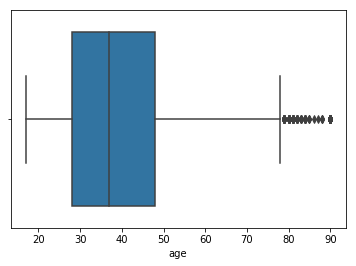

In [51]:
sns.boxplot(x='age', data=df)

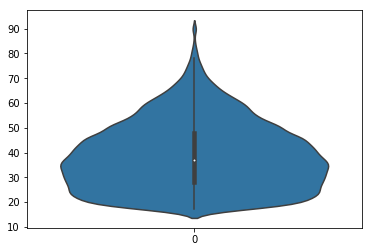

In [52]:
sns.violinplot(data=df['age']);

                     age    fnlwgt  education.num  capital.gain  capital.loss  \
age             1.000000 -0.076646       0.036527      0.077674      0.057775   
fnlwgt         -0.076646  1.000000      -0.043159      0.000437     -0.010259   
education.num   0.036527 -0.043159       1.000000      0.122627      0.079932   
capital.gain    0.077674  0.000437       0.122627      1.000000     -0.031614   
capital.loss    0.057775 -0.010259       0.079932     -0.031614      1.000000   
hours.per.week  0.068756 -0.018770       0.148127      0.078409      0.054256   

                hours.per.week  
age                   0.068756  
fnlwgt               -0.018770  
education.num         0.148127  
capital.gain          0.078409  
capital.loss          0.054256  
hours.per.week        1.000000  


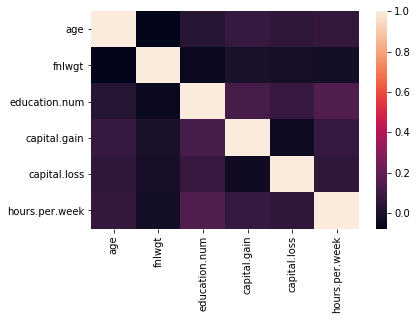

In [20]:
corr_matrix = df.corr()
print(corr_matrix)
s = sns.heatmap(corr_matrix)

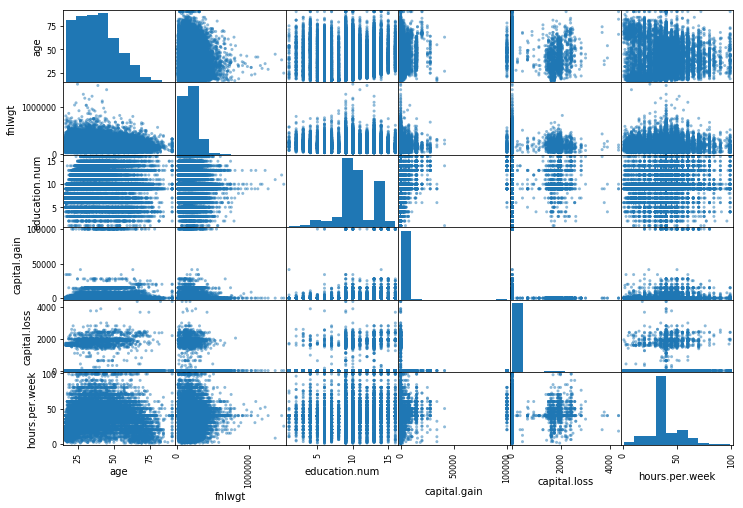

In [21]:
s = scatter_matrix(df, figsize=(12, 8))

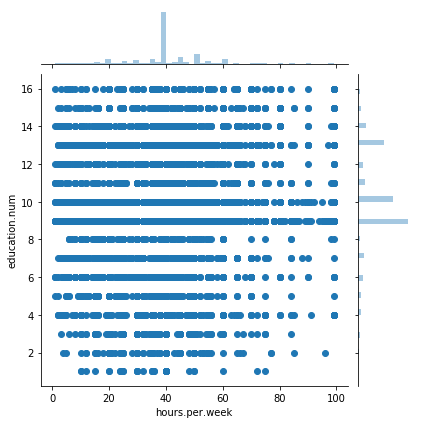

In [33]:
sns.jointplot(x='hours.per.week', y='education.num', 
              data=df, kind='scatter');

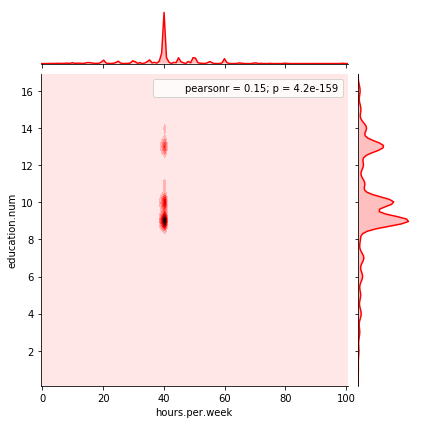

In [166]:
sns.jointplot(x='hours.per.week', y='education.num', data=df,
              kind="kde", color="r");

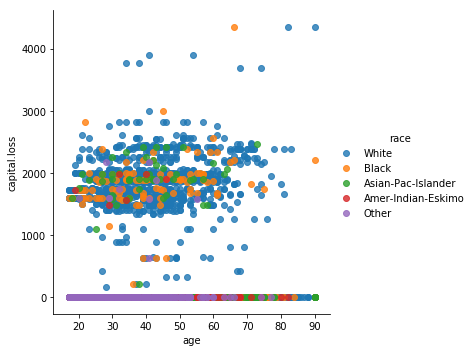

In [130]:
sns.lmplot(x='age', y='capital.loss', data=df, hue='race', fit_reg=False);

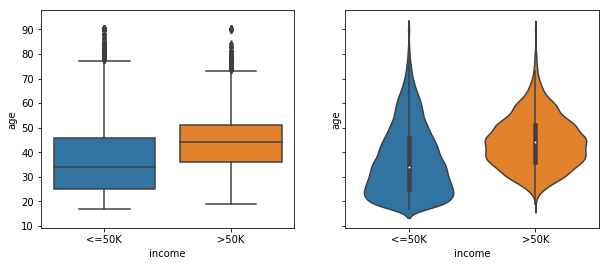

In [53]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

s = sns.boxplot(x='income', y='age', data=df, ax=axes[0])
s = sns.violinplot(x='income', y='age', data=df, ax=axes[1])

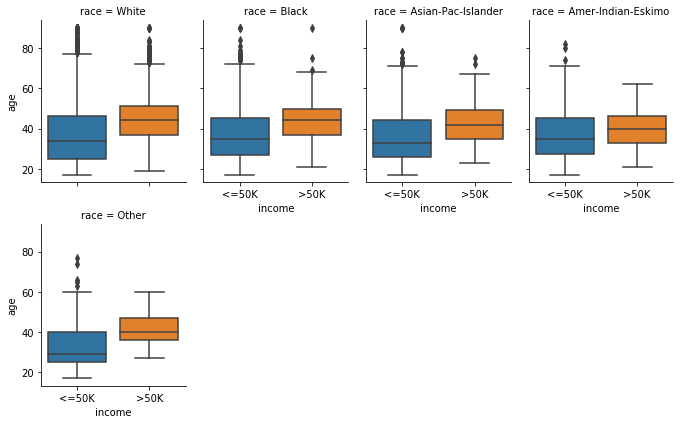

In [54]:
sns.catplot(x='income', y='age', col='race',
               data=df, kind="box",
               col_wrap=4, height=3, aspect=.8);

In [167]:
def show_dependence(x, y):
    norm = df[y].groupby(df[x]).value_counts(normalize=True).rename('count').reset_index()
    d = df[y].groupby(df[x]).value_counts(normalize=False).rename('count').reset_index()
    f, axes = plt.subplots(1, 2, figsize=(15, 6))
    sns.lineplot(x=x, y="count", hue=y, data=d, ax=axes[0])
    sns.lineplot(x=x, y="count", hue=y, data=norm, ax=axes[1])

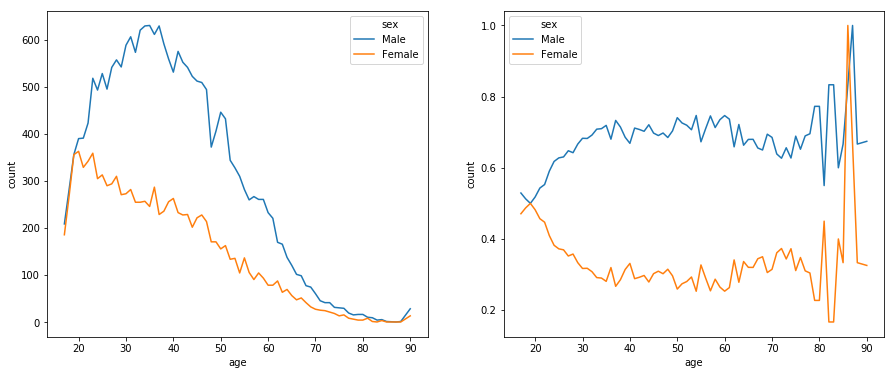

In [168]:
show_dependence('age', 'sex')

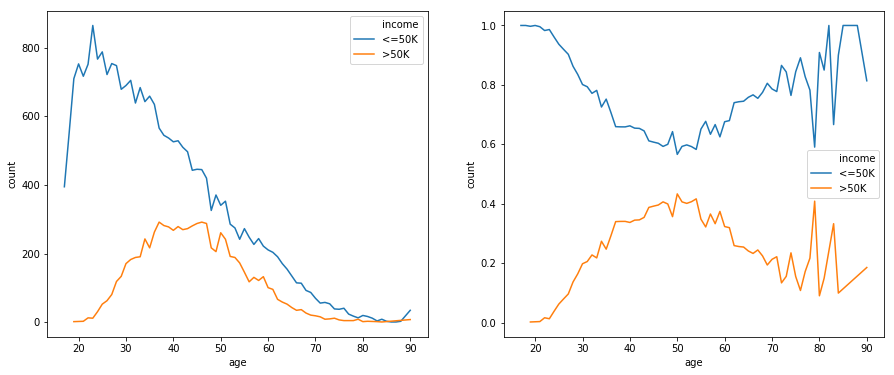

In [169]:
show_dependence('age', 'income')

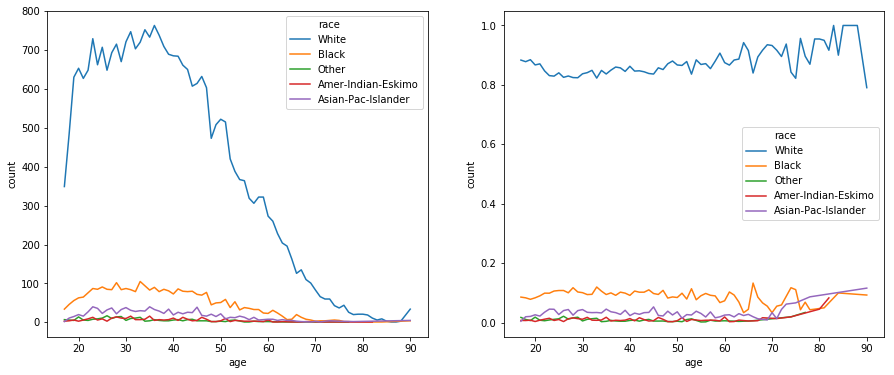

In [239]:
show_dependence('age', 'race')

In [233]:
def show_abs_dependence(x, y):
    norm = df[x].groupby(df[y]).value_counts(normalize=True).rename('count').reset_index()
    d = df[x].groupby(df[y]).value_counts(normalize=False).rename('count').reset_index()
    f, axes = plt.subplots(2, 2, figsize=(15, 14))
    sns.lineplot(x=x, y="count", hue=y, data=d, ax=axes[0][0])
    sns.lineplot(x=x, y="count", hue=y, data=norm, ax=axes[0][1])
    ax1 = sns.barplot(x=x, y="count", hue=y, data=d, ax=axes[1][0])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax2 = sns.barplot(x=x, y="count", hue=y, data=norm, ax=axes[1][1])
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

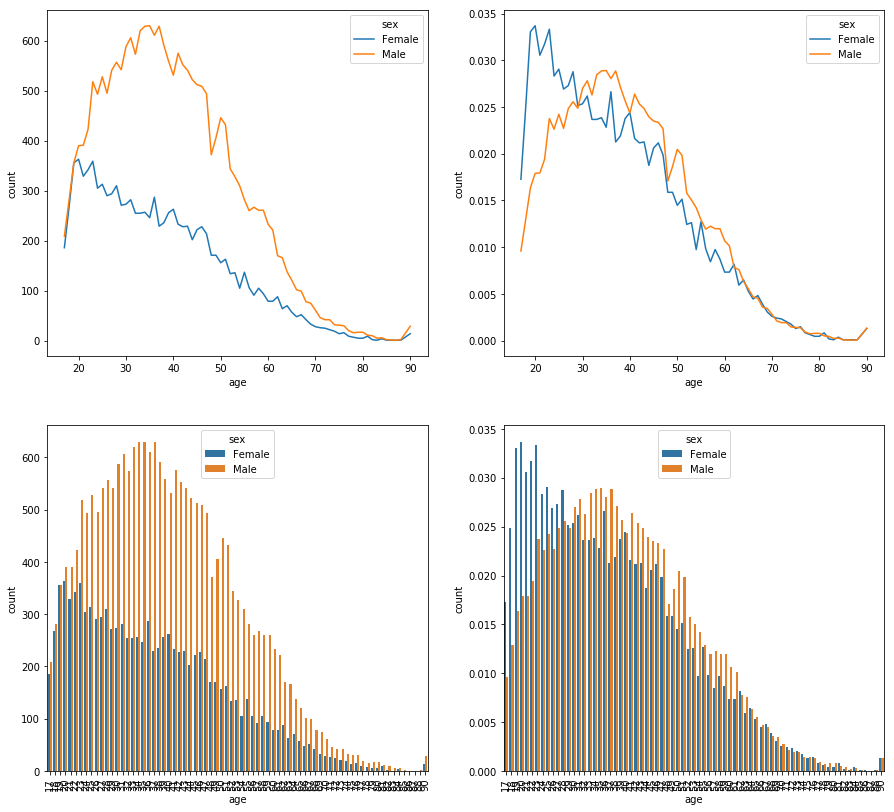

In [234]:
show_abs_dependence('age', 'sex')

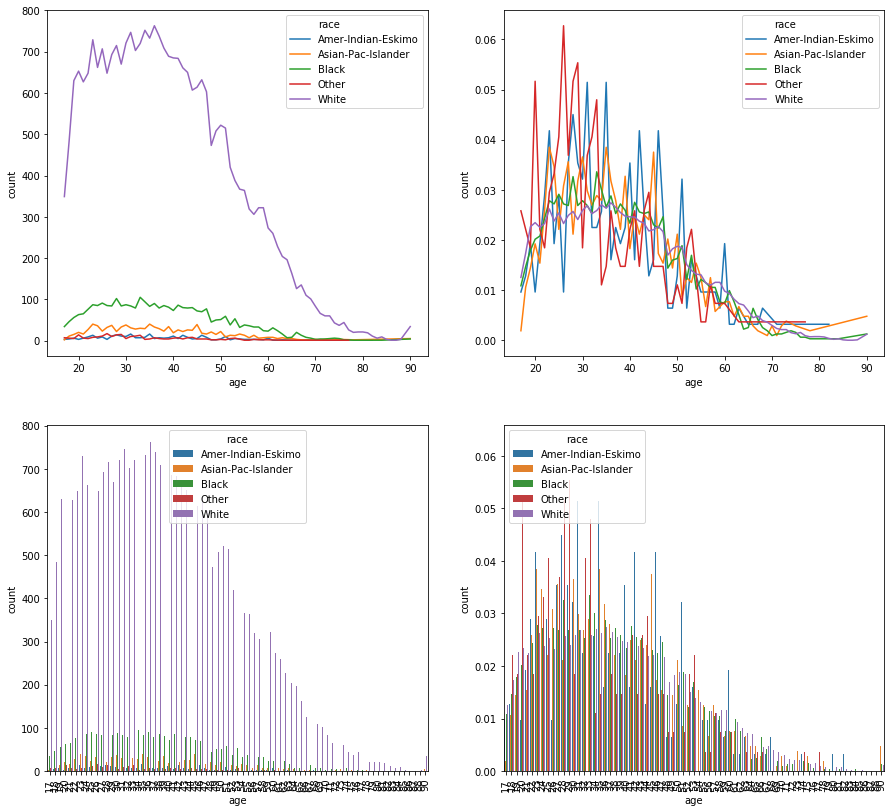

In [237]:
show_abs_dependence('age', 'race')

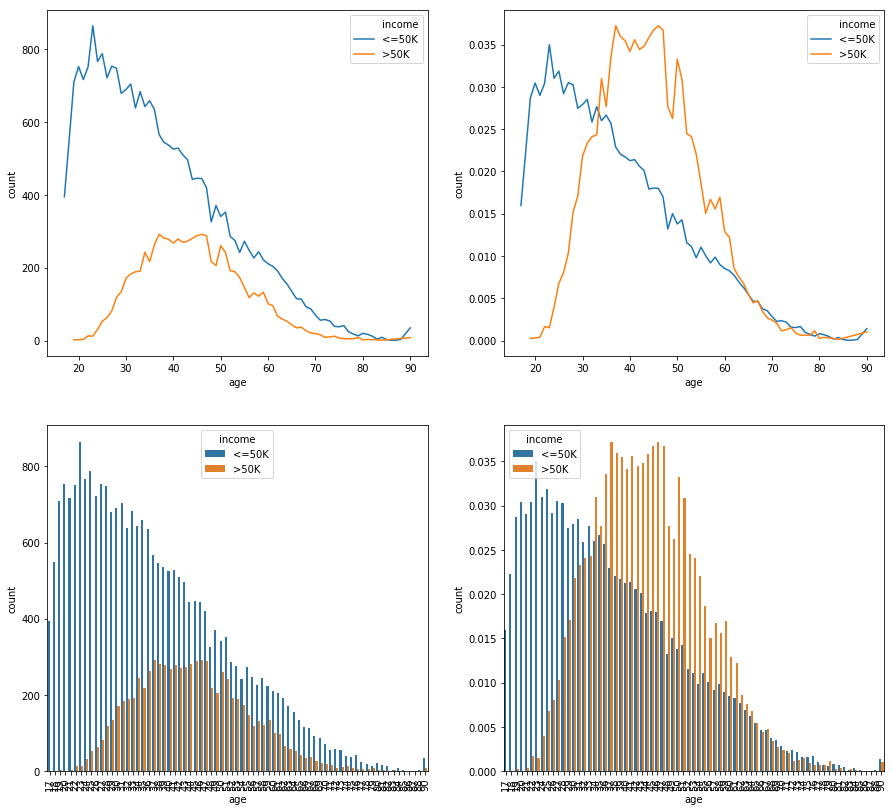

In [238]:
show_abs_dependence('age', 'income')